# Stock Portfolio Analysis

In [1]:

import random
import pandas as pd
import matplotlib.pyplot as plt

class Stock:
    def __init__(self, symbol, price, quantity):
        self.symbol = symbol
        self.price = price
        self.quantity = quantity

    def update_price(self):
        self.price = round(self.price * (1 + random.uniform(-0.05, 0.05)), 2)

    def buy(self, quantity):
        if self.quantity < quantity:
            raise ValueError("Insufficient stock available for purchase")
        self.quantity -= quantity

    def sell(self, quantity):
        self.quantity += quantity

class Portfolio:
    def __init__(self):
        self.stocks = {}
        self.balance = 10000  # Starting balance

    def add_stock(self, stock):
        self.stocks[stock.symbol] = stock

    def remove_stock(self, symbol):
        del self.stocks[symbol]

    def buy_stock(self, symbol, quantity):
        if symbol not in self.stocks:
            raise ValueError("Stock not found in portfolio")
        stock = self.stocks[symbol]
        cost = stock.price * quantity
        if self.balance < cost:
            raise ValueError("Insufficient balance for purchase")
        self.balance -= cost
        stock.buy(quantity)

    def sell_stock(self, symbol, quantity):
        if symbol not in self.stocks:
            raise ValueError("Stock not found in portfolio")
        stock = self.stocks[symbol]
        revenue = stock.price * quantity
        self.balance += revenue
        stock.sell(quantity)

    def update_stocks(self):
        for stock in self.stocks.values():
            stock.update_price()
    

## Simulating Stock Trading

In [2]:

# Initialize stocks and portfolio
stocks = [Stock("AAPL", 130.64, 100), Stock("GOOG", 1922.44, 50), Stock("MSFT", 235.99, 75)]
portfolio = Portfolio()
for stock in stocks:
    portfolio.add_stock(stock)

# Simulate 10 trading days
days = 10
portfolio_balances = []
stock_prices = {"AAPL": [], "GOOG": [], "MSFT": []}

for i in range(days):
    portfolio.update_stocks()
    portfolio_balances.append(portfolio.balance)
    for stock in portfolio.stocks.values():
        stock_prices[stock.symbol].append(stock.price)
    try:
        portfolio.buy_stock("AAPL", random.randint(1, 5))
        portfolio.sell_stock("GOOG", random.randint(1, 5))
    except ValueError:
        pass

# Create a DataFrame
data = {"Day": list(range(1, days + 1)), "Portfolio Balance": portfolio_balances}
for symbol, prices in stock_prices.items():
    data[f"{symbol} Price"] = prices
df = pd.DataFrame(data)
df


,Day,Portfolio Balance,AAPL Price,GOOG Price,MSFT Price
0,1,10000.00,131.06,1916.99,237.13
1,2,17143.72,132.46,1876.36,239.93
2,3,22507.88,137.36,1822.74,250.26
3,4,30934.78,143.02,1906.10,250.93
4,5,35937.98,146.93,1850.63,244.93
5,6,39345.38,149.05,1872.74,249.06
6,7,41069.07,149.16,1846.89,245.02
7,8,48158.31,144.30,1788.13,248.01
8,9,54589.33,146.13,1736.62,258.78
9,10,57770.31,147.02,1689.90,271.38


## Visualizations

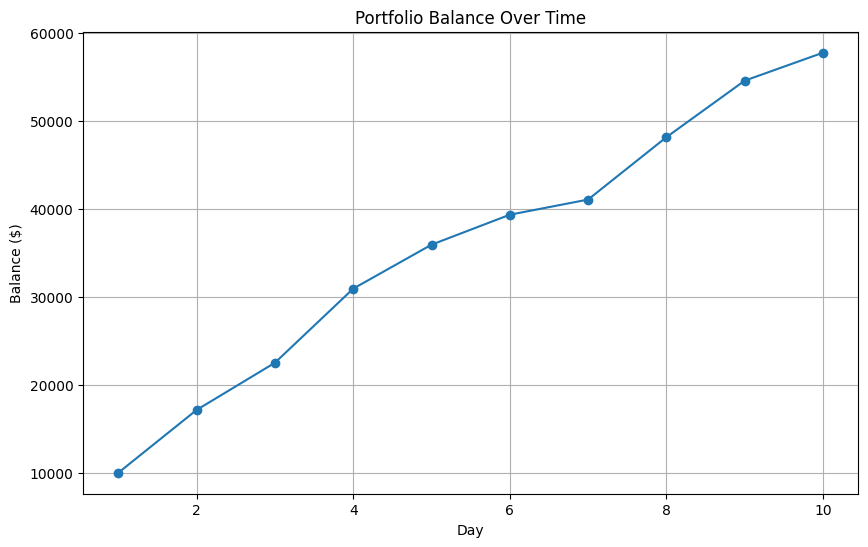

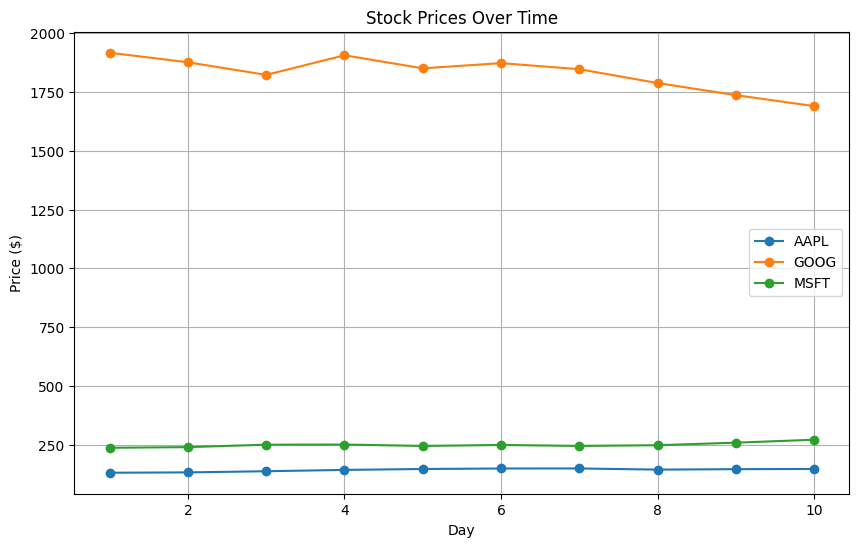

In [3]:

# Plot portfolio balance over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, days + 1), portfolio_balances, marker='o')
plt.title("Portfolio Balance Over Time")
plt.xlabel("Day")
plt.ylabel("Balance ($)")
plt.grid()
plt.show()

# Plot stock prices over time
plt.figure(figsize=(10, 6))
for symbol, prices in stock_prices.items():
    plt.plot(range(1, days + 1), prices, marker='o', label=symbol)
plt.title("Stock Prices Over Time")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()
plt.grid()
plt.show()


## Statistical Analysis

In [4]:

# Calculate additional statistics
average_prices = {symbol: df[f"{symbol} Price"].mean() for symbol in stock_prices}
max_prices = {symbol: df[f"{symbol} Price"].max() for symbol in stock_prices}
min_prices = {symbol: df[f"{symbol} Price"].min() for symbol in stock_prices}
price_ranges = {symbol: max_prices[symbol] - min_prices[symbol] for symbol in stock_prices}

# Create DataFrame for stock statistics visualization
stock_stats_df = pd.DataFrame({
    "Average Price": average_prices,
    "Max Price": max_prices,
    "Min Price": min_prices,
    "Price Range": price_ranges
})

stock_stats_df

# Portfolio growth rate calculation
portfolio_growth_rate = ((portfolio_balances[-1] - portfolio_balances[0]) / portfolio_balances[0]) * 100
portfolio_growth_rate


477.7031

## Additional Analysis

In [7]:

# Calculate volatility (standard deviation) of stock prices
volatility = {symbol: df[f"{symbol} Price"].std() for symbol in stock_prices}

# Find the day with the highest portfolio balance
highest_balance_day = df.loc[df["Portfolio Balance"].idxmax(), "Day"]

# Create a summary DataFrame for additional insights
summary_stats_df = pd.DataFrame({
    "Stock Symbol": list(volatility.keys()),
    "Volatility": list(volatility.values()),
    "Highest Balance Day": [highest_balance_day] * len(volatility)
})

summary_stats_df


,Stock Symbol,Volatility,Highest Balance Day
0,AAPL,6.682261,10
1,GOOG,73.177026,10
2,MSFT,9.749231,10


## Extended Visualizations

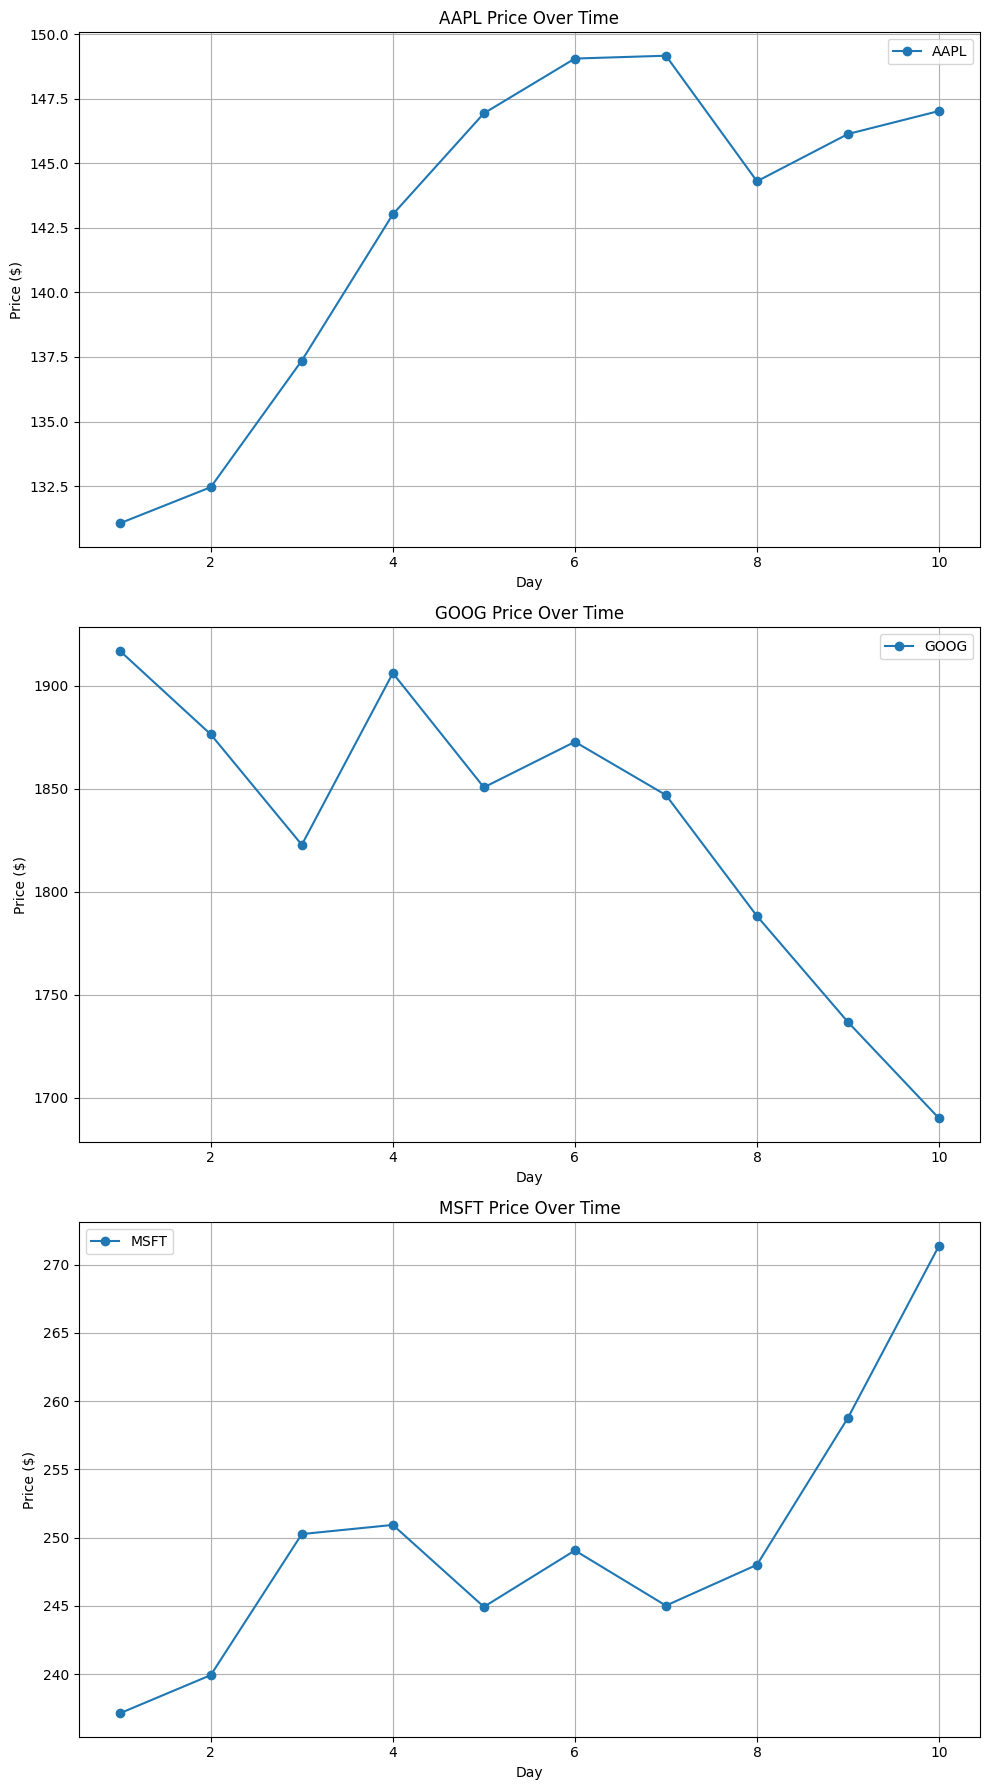

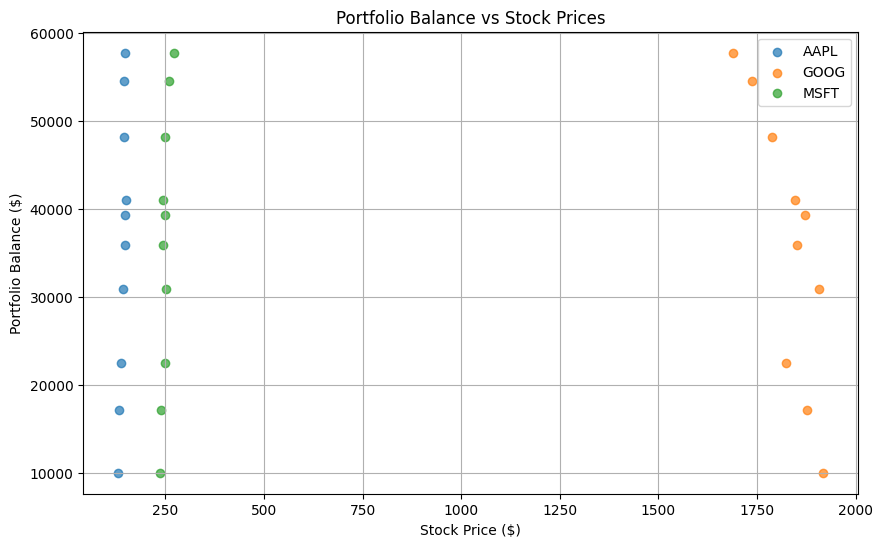

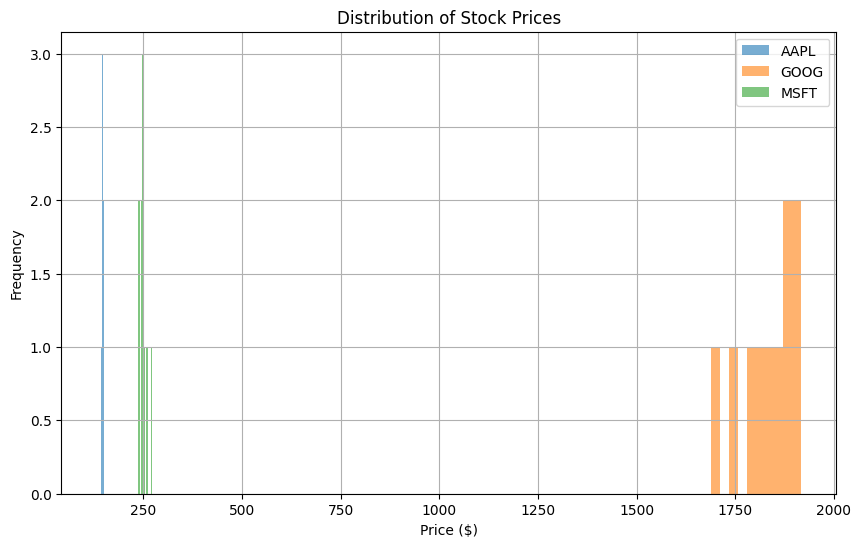

In [8]:

# Plot individual stock performance as subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
for ax, (symbol, prices) in zip(axes, stock_prices.items()):
    ax.plot(range(1, days + 1), prices, marker='o', label=symbol)
    ax.set_title(f"{symbol} Price Over Time")
    ax.set_xlabel("Day")
    ax.set_ylabel("Price ($)")
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()

# Scatter plot for portfolio balance vs stock prices
plt.figure(figsize=(10, 6))
for symbol, prices in stock_prices.items():
    plt.scatter(prices, portfolio_balances[:len(prices)], label=symbol, alpha=0.7)
plt.title("Portfolio Balance vs Stock Prices")
plt.xlabel("Stock Price ($)")
plt.ylabel("Portfolio Balance ($)")
plt.legend()
plt.grid()
plt.show()

# Histogram of stock price distributions
plt.figure(figsize=(10, 6))
for symbol, prices in stock_prices.items():
    plt.hist(prices, bins=10, alpha=0.6, label=symbol)
plt.title("Distribution of Stock Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


## Predictive Analysis

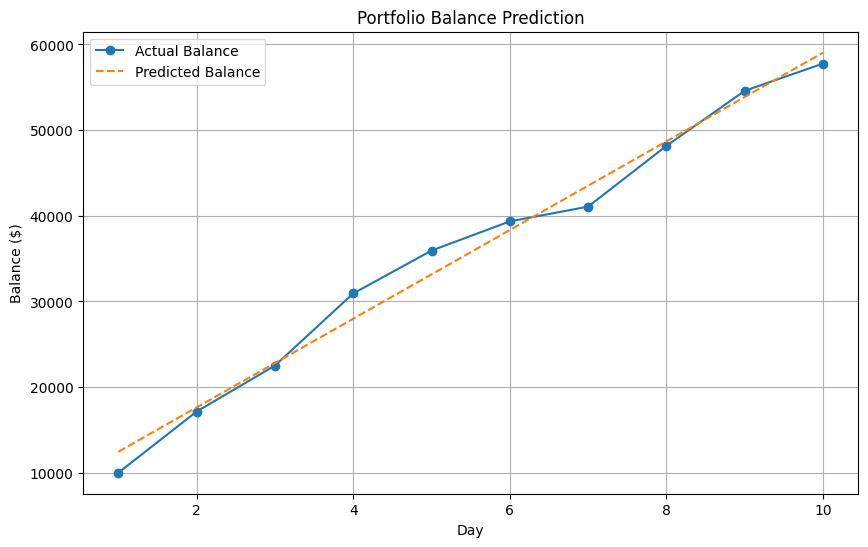

(5176.451393939393, 7275.19333333334, 0.9856475277530837)

In [10]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Predict portfolio balance trends using linear regression
X = np.array(range(1, days + 1)).reshape(-1, 1)  # Days as independent variable
y = np.array(portfolio_balances)  # Portfolio balances as dependent variable

model = LinearRegression()
model.fit(X, y)
predicted_balances = model.predict(X)

# Plot actual vs predicted portfolio balances
plt.figure(figsize=(10, 6))
plt.plot(range(1, days + 1), portfolio_balances, marker='o', label="Actual Balance")
plt.plot(range(1, days + 1), predicted_balances, linestyle='--', label="Predicted Balance")
plt.title("Portfolio Balance Prediction")
plt.xlabel("Day")
plt.ylabel("Balance ($)")
plt.legend()
plt.grid()
plt.show()

# Model coefficients and R-squared value
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
(slope, intercept, r_squared)


## Comparative Statistics

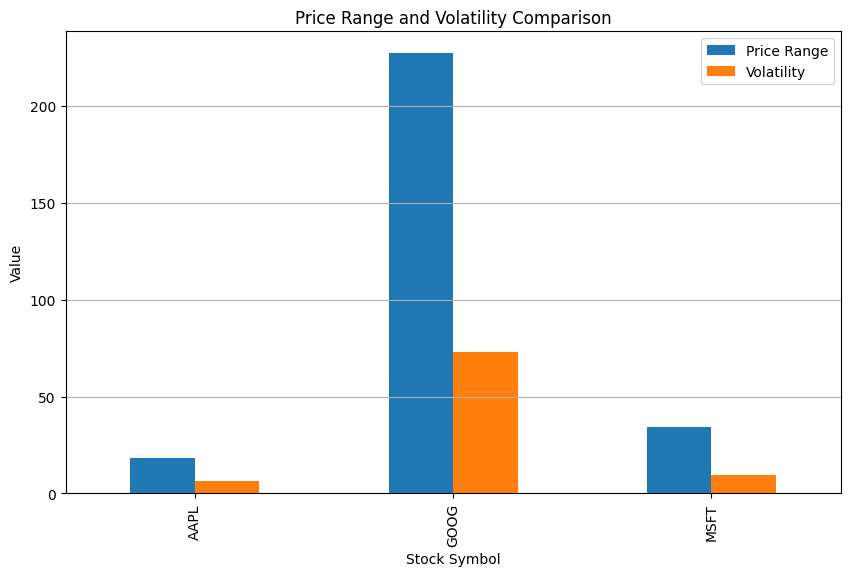

In [11]:

# Compare price ranges and volatilities
comparison_df = pd.DataFrame({
    "Stock Symbol": list(volatility.keys()),
    "Price Range": list(price_ranges.values()),
    "Volatility": list(volatility.values())
})

comparison_df.plot(kind="bar", x="Stock Symbol", figsize=(10, 6))
plt.title("Price Range and Volatility Comparison")
plt.ylabel("Value")
plt.grid(axis="y")
plt.show()
